### Regularized linear regression: vias versus variance

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water 
owing out of a dam using the change of water level in a reservoir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the water datasets

In [4]:
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
data=loadmat('ex5data1.mat')

In [9]:
# You will have X, y, Xval, yval, Xtest, ytest in your environment
print(type(data))
print('')
print(data.keys())

<class 'dict'>

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


In [22]:
# Create a dataframe water, water_test, water_train

water=np.concatenate((data['X'], data['y']), axis=1)
water=pd.DataFrame(water, columns=['X','y'])

water_test=np.concatenate((data['Xtest'], data['ytest']), axis=1)
water_test=pd.DataFrame(water, columns=['Xtest','ytest'])

water_val=np.concatenate((data['Xval'], data['yval']), axis=1)
water_val=pd.DataFrame(water, columns=['Xval','yval'])

### 2. Visualization, plot the training data

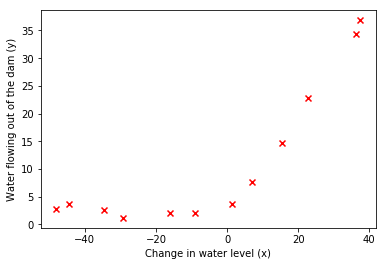

In [27]:
X=water['X']
y=water['y']
m = len(X)
plt.scatter(X, y, c='r', marker='x');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');


### 3: Regularized Linear Regression Cost

In [30]:
theta =np.ones((2,1))
X=pd.concat((pd.DataFrame(np.ones((m,1))), X), axis=1) # add x0=1 for X

In [32]:
def linearRegCostFunction(X, y, theta, lamb):
    """
    LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear regression with multiple variables
    [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the cost of using theta as the parameter 
    for linear regression to fit the data points in X and y. Returns the cost in J and the gradient in grad
    lamb: penalty factor
    """
    thetanew=theta.copy()
    thetanew[0]=0
    m = len(y); # number of training examples
    J = 0;
    grad = np.zeros(len(theta))
    J=1/(2*m)*((np.array(X.dot(theta)[0])-np.array(y))**2).sum()+(theta*theta).sum()*lamb/2/m
    grad=1/m*((np.array(X.dot(theta)[0])-np.array(y)).reshape(1,m).dot(X)).reshape(X.shape[1],1)+lamb/m*thetanew
    return J,grad

In [36]:
J,grad = linearRegCostFunction(X, y, theta, 1)
print('Cost J returned by the function is:', J)
print('grad returned by the function is: ', grad)
print('correct answer for cost is 303.993')
print('correct answer for grad is [-15.30, 598.25]')

Cost J returned by the function is: 304.034858887
grad returned by the function is:  [[ -15.30301567]
 [ 598.25074417]]
correct answer for cost is 303.993
correct answer for grad is [-15.30, 598.25]


###  4: Train Linear Regression 

Once you have implemented the cost and gradient correctly, the trainLinearReg function will use your cost function to train regularized linear regression.

Write Up Note: The data is non-linear, so this will not give a great fit.

In [40]:
def trainLinearReg(X, y, lamb):
    
    """Use scipy.optimize to get theta from X,y and regularization theta"""
    import numpy as np
    import scipy.optimize as op

    X=np.array(X)
    y=np.array(y)

    def Gradient(theta,x,y):
        m , n = x.shape
        theta = theta.reshape((n,1))
        newtheta=theta.copy()
        newtheta[0]=0
        y = y.reshape((m,1))
        grad = ((x.T).dot(x.dot(theta)-y))/m+lamb/m*newtheta;
        return grad.flatten();
    
    def CostFunc(theta,x,y):
        m,n = x.shape; 
        theta = theta.reshape((n,1))
        thetaofirst=np.delete(theta,0,0) 
        J = 1/(2*m)*((np.array(X.dot(theta)[0])-np.array(y))**2).sum()+lamb*(thetaofirst*thetaofirst).sum()/2/m ;
        return J;

    m , n = X.shape;
    initial_theta = np.ones(n);
    Result = op.minimize(fun = CostFunc, x0 = initial_theta, args = (X, y),method = 'TNC',jac = Gradient);
    optimal_theta = Result.x;     
    return optimal_theta

In [44]:
#  Train linear regression with lambda = 0
lamb = 0;
theta = trainLinearReg(X, y, lamb);
y_pred=X.dot(theta)

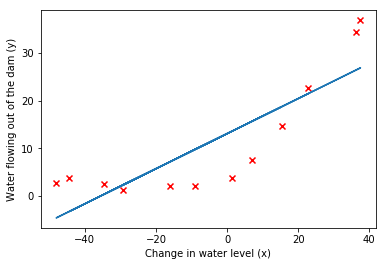

In [46]:
#  Plot fit over the data
plt.scatter(X['X'], y, c='r', marker='x');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.plot(X['X'], y_pred)